In [1]:
%%capture
%run test_data.ipynb

In [2]:
import sys 
sys.path.append('..')
import portfolios as p

# Do momentum portfolios work as expected?

Strategy: at the beginning of each month form portfolios based on momentum.

Momentum here: return of the stock in last month. Stocks are assigned into $N$ portfolios based on momentum. Worst performing stocks into the $\#1$ portfolio and best performing stocks into the $\#N$ portfolio. Portfolios are rebalanced monthly.

### Data

CRSP monthly. All US listed stocks from 201502 to 201911.

In [3]:
lag_data = p.lag_returns(data,1) # Adds LRET_1 variable (lagged returns) to the data

### $N=5$

In [4]:
assigned_data_5 = p.form_portfolios(lag_data,'LRET_1',5)

Progress...
201601 201605 201602 201509 201604 201603 201505 201508 201506 201512 201507 201502 201504 201510 201503 201511 201607 201609 201610 201608 201606 201705 201703 201704 201702 201611 201701 201706 201612 201707 201709 201708 201806 201710 201807 201711 201712 201808 201803 201801 201802 201811 201809 201804 201501 201912 201810 201812 201805 201901 201902 201903 201904 201907 201908 201905 201909 201906 201910 201911 Done. Execution time: 292.085s


Number of stocks in the portfolios.

In [5]:
p.portfolios_summary_table(assigned_data_5,'LRET_1').head()

,1,2,3,4,5
date,,,,,
201502,703,702.0,703.0,702.0,703
201503,708,707.0,708.0,707.0,708
201504,709,709.0,708.0,709.0,709
201505,707,707.0,706.0,707.0,707
201506,708,707.0,708.0,707.0,708


In [20]:
returns_5 = p.portfolios_returns_mean_table(assigned_data_5,'LRET_1',5)[:-1]

..\portfolios.py:116: RuntimeWarning: Mean of empty slice.
  returns[i] = p_data["RET"].values.mean()
c:\users\jaakko\python\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


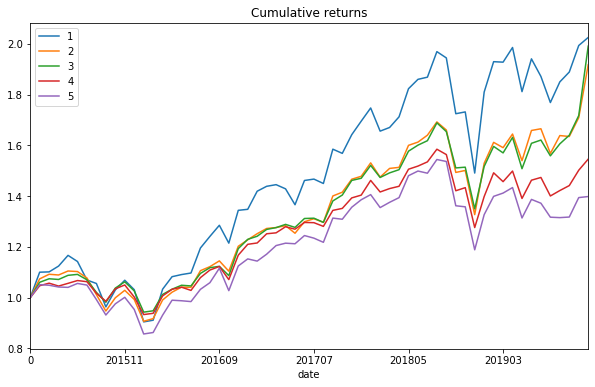

In [21]:
p.plot_cumulative(returns_5)

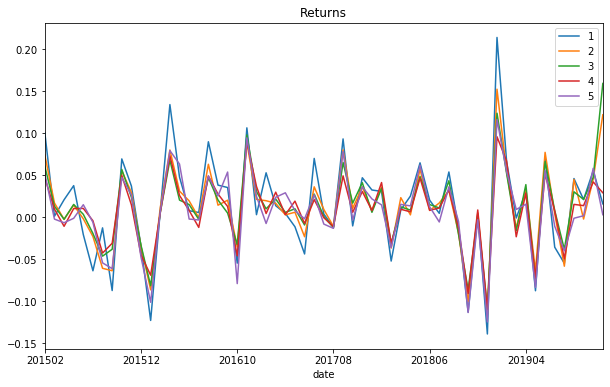

In [22]:
returns_5.plot(title='Returns',figsize=(10,6))

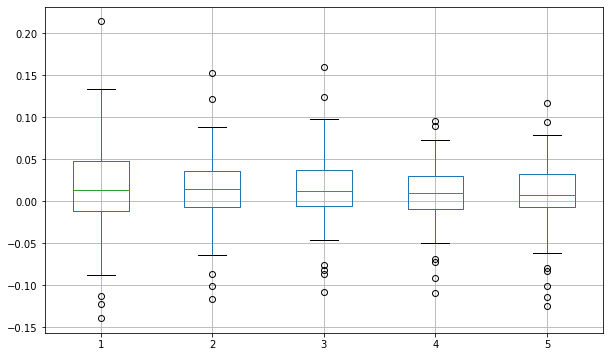

In [23]:
returns_5.boxplot(figsize=(10,6))

In [24]:
returns_5.describe()

,1,2,3,4,5
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.013889,0.012297,0.012784,0.008204,0.006844
std,0.061759,0.049537,0.046342,0.039974,0.047840
min,-0.139090,-0.115921,-0.108453,-0.109705,-0.124723
25%,-0.012172,-0.006765,-0.005926,-0.009232,-0.006377
50%,0.013664,0.014278,0.012294,0.009683,0.007800
75%,0.047318,0.035960,0.036587,0.030195,0.032601
max,0.214033,0.152425,0.159274,0.095791,0.116516


In [25]:
p.quantile_table(assigned_data_5,'LRET_1',5).head()

,date,1,2,3,4,5
0,201502,-0.109967,-0.058910,-0.017234,0.036168,1.443877
1,201503,-0.010707,0.035688,0.075177,0.129568,3.736842
2,201504,-0.055281,-0.010482,0.020057,0.063572,1.659824
3,201505,-0.069785,-0.027854,0.002560,0.051632,9.564357
4,201506,-0.050910,-0.004872,0.023170,0.070927,2.124024


### $N=10$

In [12]:
assigned_data_10 = p.form_portfolios(lag_data,'LRET_1',10)

Progress...
201502 201510 201604 201503 201512 201601 201602 201506 201605 201504 201511 201505 201509 201507 201508 201603 201610 201606 201611 201705 201703 201612 201704 201701 201607 201609 201608 201702 201706 201709 201707 201708 201710 201801 201805 201711 201802 201803 201808 201806 201712 201807 201804 201912 201810 201501 201811 201809 201812 201901 201902 201904 201903 201905 201906 201908 201907 201909 201911 201910 Done. Execution time: 293.004s


Number of stocks in the portfolios.

In [27]:
returns_10 = p.portfolios_returns_mean_table(assigned_data_10,'LRET_1',10)[:-1]

..\portfolios.py:116: RuntimeWarning: Mean of empty slice.
  returns[i] = p_data["RET"].values.mean()
c:\users\jaakko\python\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


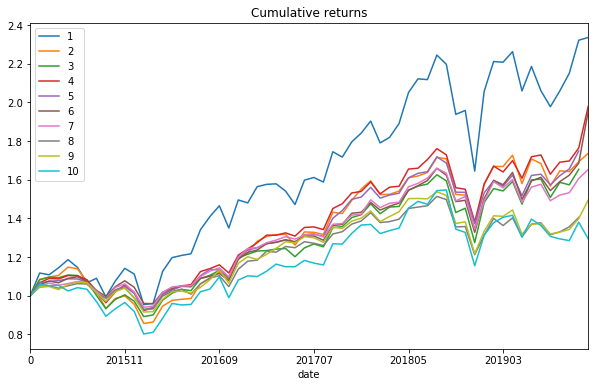

In [28]:
p.plot_cumulative(returns_10)

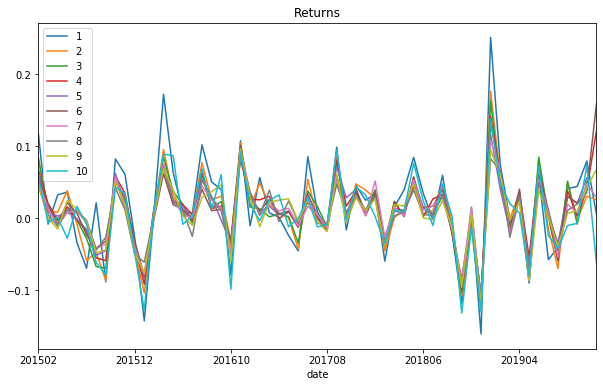

In [29]:
returns_10.plot(title='Returns',figsize=(10,6))

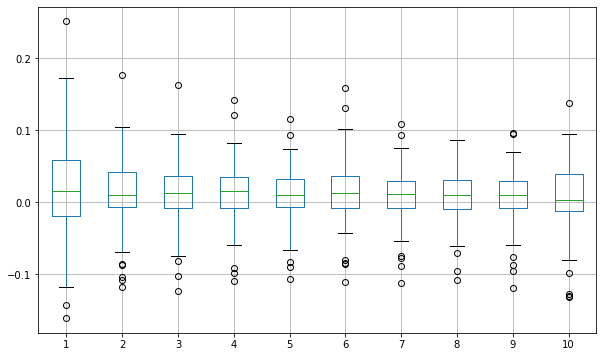

In [30]:
returns_10.boxplot(figsize=(10,6))

In [31]:
returns_10.describe()

,1,2,3,4,5,6,7,8,9,10
count,59.000000,59.000000,58.000000,59.000000,58.000000,59.000000,59.000000,58.000000,59.000000,59.000000
mean,0.016924,0.010847,0.009936,0.012759,0.010582,0.012470,0.009402,0.006642,0.007750,0.005938
std,0.071014,0.054456,0.050067,0.047840,0.042819,0.046544,0.041421,0.039290,0.042901,0.055962
min,-0.160485,-0.117631,-0.122538,-0.109304,-0.105729,-0.111169,-0.112248,-0.107162,-0.119245,-0.131372
25%,-0.018538,-0.006295,-0.007880,-0.007591,-0.006842,-0.007755,-0.008127,-0.008585,-0.007583,-0.011694
50%,0.016069,0.010189,0.012917,0.016053,0.010101,0.012701,0.011535,0.009884,0.010871,0.002998
75%,0.058356,0.041974,0.036596,0.035313,0.033080,0.037045,0.030298,0.030409,0.029303,0.039002
max,0.251240,0.176715,0.163138,0.141744,0.116314,0.159274,0.108610,0.086102,0.096419,0.137856


In [32]:
p.quantile_table(assigned_data_10,'LRET_1',10).head()

,date,1,2,3,4,5,6,7,8,9,10
0,201502,-0.156603,-0.109967,-0.084577,-0.058910,-0.038500,-0.017234,0.003772,0.036168,0.089825,1.443877
1,201503,-0.057117,-0.010707,0.013144,0.035688,0.055979,0.075177,0.098843,0.129568,0.193817,3.736842
2,201504,-0.105240,-0.055281,-0.028543,-0.010482,0.003471,0.020057,0.038002,0.063572,0.112004,1.659824
3,201505,-0.111657,-0.069785,-0.045531,-0.027854,-0.012498,0.002560,0.023105,0.051632,0.111985,9.564357
4,201506,-0.102917,-0.050910,-0.023173,-0.004872,0.008058,0.023170,0.041265,0.070927,0.130288,2.124024
